## Runge-Kutta's 4th Order Method for The Problems in Radioactivity

The basic equation in radioactivity is $$\frac{\mathrm{d}N}{\mathrm{d}t}=-\lambda N$$ In which the particular solution is $$N=N_0e^{-\lambda t}$$ where $N_0$ is the initial amount of the radioactive substance.

Here's the importation of the packages.

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

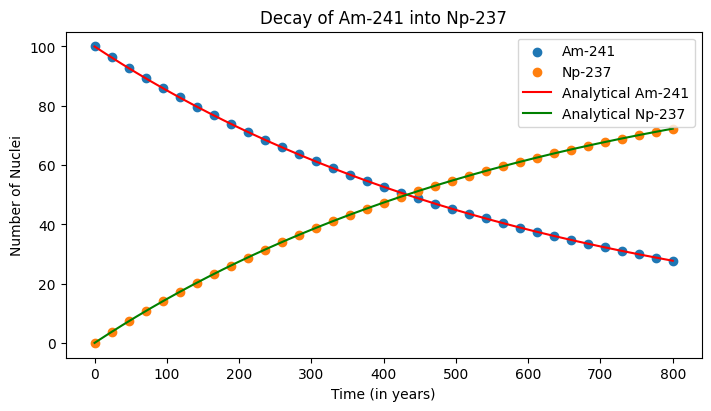

In [2]:
#Declaring half-lifes (P1, in years)

HalfAm=432.2 #in years

def Lambda(x):
    return math.log(2)/x

LambdaAm=Lambda(HalfAm)

def FirstProblem(t,y):
    return -LambdaAm*y


def RungeKutta4(f,a,b,n,y0):
    h=(b-a)/(n-1)
    xs=a+np.arange(n)*h
    ys=np.zeros(n)
    y=y0

    for j,x in enumerate(xs):
        ys[j]=y
        k0=h*f(x,y)
        k1=h*f(x+h/2,y+k0/2)
        k2=h*f(x+h/2,y+k1/2)
        k3=h*f(x+h,y+k2)
        y+=(k0+2*k1+2*k2+k3)/6
    return xs,ys

res=RungeKutta4(FirstProblem,0,800,35,100)

t=np.linspace(0,800,500)

N=np.zeros(len(t))

for i in range(len(t)):
    N[i]=100*math.exp(-LambdaAm*t[i])

Np=100-N

fig,ax=plt.subplots(figsize=(7, 4), layout='constrained')
ax.scatter(res[0],res[1],label='Am-241')
ax.scatter(res[0],100-res[1],label='Np-237')
ax.plot(t,N,'red',label='Analytical Am-241')
ax.plot(t,Np,'green',label='Analytical Np-237')
ax.legend()
ax.set_ylabel('Number of Nuclei')
ax.set_xlabel('Time (in years)')
ax.set_title('Decay of Am-241 into Np-237');


Second problem. Probabilistic decay of K40.

The equations to be solved are listed below.

\begin{align}
\frac{\mathrm{d}N_1}{\mathrm{dt}}&=-\lambda_1N_1 \\
\frac{\mathrm{d}N_2}{\mathrm{dt}}&=\lambda_{12}N_1\\
\frac{\mathrm{d}N_3}{\mathrm{dt}}&=\lambda_{13}N_1
\end{align}

where $N_1$ refers to K-40, $N_2$ to Ca-40, and $N_3$ to Ar-40.

In [39]:
#Parameter definition (time in million years)

K40=1250

LambdaK=Lambda(K40)
LambdaKCa=0.893*LambdaK
LambdaKAr=0.107*LambdaK

#Function

def F(t,u):
    N1,N2,N3=u
    return np.array([-LambdaK*N1,LambdaKCa*N1,LambdaKAr*N1])

def RK4System(f,u0,t0,tf,n):
    t=np.linspace(t0,tf,n+1)
    u=np.array((n+1)*[u0])
    h=t[1]-t[0]
    for i in range(n):
        k0=h*f(t[i],u[i])
        k1=h*f(t[i]+h/2,u[i]+k0/2)
        k2=h*f(t[i]+h/2,u[i]+k1/2)
        k3=h*f(t[i]+h,u[i]+k2)
        u[i+1]=u[i]+(k0+2*k1+2*k2+k3)/6
    return u,t


init=np.array([100.,0.,0.])
u,t=RK4System(F,init,0.,3000.,70)
u=u.T


Plotting.

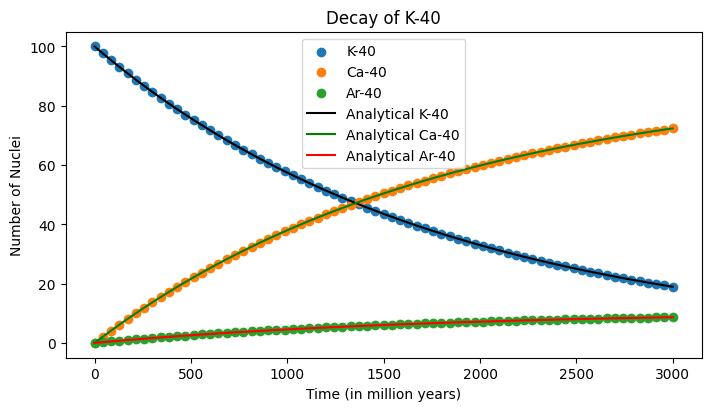

In [40]:
def AnalyticalN(N0,t,DC):
    N=[]
    for i in range(len(t)):
        N.append(N0*math.exp(-DC*t[i]))
    return np.array(N)

T=np.linspace(0,3000,1000)

KAnalytical=AnalyticalN(100,T,LambdaK)
CaAnalytical=np.zeros(len(T))
ArAnalytical=np.zeros(len(T))
for i in range(len(T)):
    CaAnalytical[i]=LambdaKCa/LambdaK*(100)*(1-math.exp(-LambdaK*T[i]))
    ArAnalytical[i]=LambdaKAr/LambdaK*(100)*(1-math.exp(-LambdaK*T[i]))

fig,ax=plt.subplots(figsize=(7, 4), layout='constrained')
ax.scatter(t,u[0],label='K-40')
ax.scatter(t,u[1],label='Ca-40')
ax.scatter(t,u[2],label='Ar-40')
ax.plot(T,KAnalytical,'k',label='Analytical K-40')
ax.plot(T,CaAnalytical,'g',label='Analytical Ca-40')
ax.plot(T,ArAnalytical,'r',label='Analytical Ar-40')
ax.legend()
ax.set_ylabel('Number of Nuclei')
ax.set_xlabel('Time (in million years)')
ax.set_title('Decay of K-40')
plt.show()


Therefore, we could see that RK-4 agrees with the analytical solution.